#### Loading libraries -----

In [17]:
import json
import requests
from bs4 import BeautifulSoup
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy

#### Loading dataset -----

In [39]:
location = 'D:/ds4a_team80/R_scripts/input/Data/Hospitalizaciones_v1.xlsx'

Hospitzaliaciones = pd.read_excel(location)
Hospitzaliaciones['Año Ingreso'] = pd.DatetimeIndex(Hospitzaliaciones['Fecha Ingreso']).year 
Hospitzaliaciones


,Id,Sexo,EDAD (Años),Id Diagnostico Egreso,Descripción diagnostico (egreso),Dias Uci,Dias Uce,Días de Estancia (Calculada),Fecha Ingreso,Fecha Egreso,Año Ingreso
0,1381384,Femenino,43,R060,DISNEA,0,0,0,2020-05-22,2020-05-22,2020
1,1118363,Masculino,6,R060,DISNEA,0,0,0,2020-01-02,2020-01-02,2020
2,1118363,Masculino,6,R060,DISNEA,0,0,0,2020-01-02,2020-01-02,2020
3,978163,Masculino,12,E848,FIBROSIS QUÍSTICA CON OTRAS MANIFESTACIONES,0,0,0,2019-05-23,2019-05-23,2019
4,1140753,Masculino,31,J459,"ASMA, NO ESPECIFICADA",0,0,0,2018-08-22,2018-08-22,2018
...,...,...,...,...,...,...,...,...,...,...,...
1745,1772651,Femenino,67,J441,ENFERMEDAD PULMONAR OBSTRUCTIVA CRÓNICA CON EX...,0,1,13,2017-02-08,2017-02-21,2017
1746,664514,Femenino,36,J459,"ASMA, NO ESPECIFICADA",0,0,8,2017-02-13,2017-02-21,2017
1747,1391509,Femenino,4,J459,"ASMA, NO ESPECIFICADA",0,0,2,2017-02-19,2017-02-21,2017
1748,1339118,Masculino,81,J459,"ASMA, NO ESPECIFICADA",0,0,9,2017-02-19,2017-02-28,2017


#### Basic Quantities -----

In [45]:
print('Número de Registros: ' +  str(len(Hospitzaliaciones['Id']) )) 
print('Número de Pascientes: ' +  str(len(Hospitzaliaciones['Id'].unique())) )
print('Cantidad de Diagnósticos distintos: ' +  str(len(Hospitzaliaciones['Descripción diagnostico (egreso)'].unique())) )
print('Cantidad de Códigos de Diagnósticos distintos: ' +  str(len(Hospitzaliaciones['Id Diagnostico Egreso'].unique())) )
print('----')
print('Cantidad de dias Máximo en UCI: ' +  str((Hospitzaliaciones['Dias Uci'].max())) )
print('Cantidad de dias Media en UCI: ' +  str((Hospitzaliaciones['Dias Uci'].mean())) )
print('Cantidad de dias Mínimo en UCI: ' +  str((Hospitzaliaciones['Dias Uci'].min())) )
print('----')
print('Cantidad de dias Máximo en UCE: ' +  str((Hospitzaliaciones['Dias Uce'].max())) )
print('Cantidad de dias Media en UCE: ' +  str((Hospitzaliaciones['Dias Uce'].mean())) )
print('Cantidad de dias Mínimo en UCE: ' +  str((Hospitzaliaciones['Dias Uce'].min())) )
print('----')
print('Cantidad de dias Máximo en UCE: ' +  str((Hospitzaliaciones['Dias Uce'].max())) )
print('Cantidad de dias Media en UCE: ' +  str((Hospitzaliaciones['Dias Uce'].mean())) )
print('Cantidad de dias Mínimo en UCE: ' +  str((Hospitzaliaciones['Dias Uce'].min())) )
print('----')
print('Cantidad de dias de Estancia Máximo: ' +  str((Hospitzaliaciones['Días de Estancia (Calculada)'].max())) )
print('Cantidad de dias de Estancia Media: ' +  str((Hospitzaliaciones['Días de Estancia (Calculada)'].mean())) )
print('Cantidad de dias de Estancia Mínimo: ' +  str((Hospitzaliaciones['Días de Estancia (Calculada)'].min())) )
Hospitzaliaciones['EDAD (Años)'].describe()

Número de Registros: 1750
Número de Pascientes: 357
Cantidad de Diagnósticos distintos: 322
Cantidad de Códigos de Diagnósticos distintos: 317
----
Cantidad de dias Máximo en UCI: 35
Cantidad de dias Media en UCI: 0.244
Cantidad de dias Mínimo en UCI: 0
----
Cantidad de dias Máximo en UCE: 24
Cantidad de dias Media en UCE: 0.2754285714285714
Cantidad de dias Mínimo en UCE: 0
----
Cantidad de dias Máximo en UCE: 24
Cantidad de dias Media en UCE: 0.2754285714285714
Cantidad de dias Mínimo en UCE: 0
----
Cantidad de dias de Estancia Máximo: 147
Cantidad de dias de Estancia Media: 6.015428571428571
Cantidad de dias de Estancia Mínimo: 0


count    1750.000000
mean       47.198286
std       150.419418
min         0.000000
25%        20.000000
50%        40.000000
75%        57.000000
max      2679.000000
Name: EDAD (Años), dtype: float64

#### Nulls count ----

In [37]:
Hospitzaliaciones.isnull().sum()

Id                                   0
Sexo                                 0
EDAD (Años)                          0
Id Diagnostico Egreso               45
Descripción diagnostico (egreso)     0
Dias Uci                             0
Dias Uce                             0
Días de Estancia (Calculada)         0
Fecha Ingreso                        0
Fecha Egreso                         0
dtype: int64

#### Exploring variables ----

##### Age -----

D:\ANACONDA\lib\site-packages\ipykernel_launcher.py:7: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  import sys


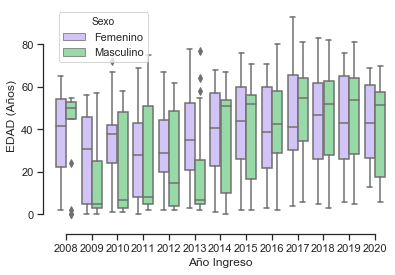

In [51]:
sns.set(style="ticks", palette="pastel")

data_plot = ( 
 Hospitzaliaciones.\
    filter(['Sexo', 'EDAD (Años)', 'Fecha Ingreso', 'Año Ingreso']).\
    drop_duplicates()
)[Hospitzaliaciones['EDAD (Años)'] < 150]

sns.boxplot(
    y="EDAD (Años)", 
    x="Año Ingreso",
    hue="Sexo", 
    palette=["m", "g"],
    data=data_plot,
    #height=2.5, aspect=6
)

sns.despine(offset=10, trim=True)

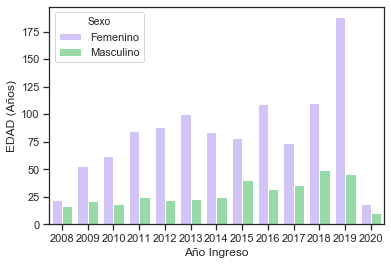

In [68]:
data_plot = ( 
 Hospitzaliaciones[Hospitzaliaciones['EDAD (Años)'] < 150].\
    filter(['Id', 'Sexo', 'EDAD (Años)', 'Fecha Ingreso', 'Año Ingreso']).\
    drop_duplicates().\
    groupby(['Id', 'Sexo', 'Año Ingreso']).\
    count().\
    reset_index().\
    drop(['Id'], axis = 1).\
    groupby(['Sexo', 'Año Ingreso']).\
    sum().\
    reset_index()
)

data_plot

sns.barplot(
    y="EDAD (Años)", 
    x="Año Ingreso",
    hue="Sexo", 
    palette=["m", "g"],
    data=data_plot,
    #height=2.5, aspect=6
)



,Id Diagnostico Egreso,Descripción diagnostico (egreso)
4,J459,"ASMA, NO ESPECIFICADA"
12,J449,"ENFERMEDAD PULMONAR OBSTRUCTIVA CRÓNICA, NO ES..."
13,J46X,ESTADO ASMÁTICO
48,J159,"NEUMONÍA BACTERIANA, NO ESPECIFICADA"
60,J189,"NEUMONÍA, NO ESPECIFICADA"
61,J441,ENFERMEDAD PULMONAR OBSTRUCTIVA CRÓNICA CON EX...
94,J46X,ESTADO ASMÃTICO
125,J450,ASMA PREDOMINANTEMENTE ALÉRGICA
136,J180,"BRONCONEUMONÃA, NO ESPECIFICADA"
137,J019,"SINUSITIS AGUDA, NO ESPECIFICADA"


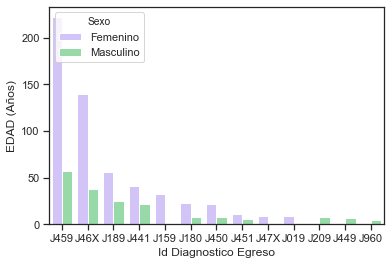

In [92]:
data_plot = Hospitzaliaciones[~Hospitzaliaciones['Id Diagnostico Egreso'].isnull()] 
data_plot = data_plot[data_plot['Id Diagnostico Egreso'].str.contains('^J', regex = True)]

data_plot = ( 
 data_plot[data_plot['EDAD (Años)'] < 150].\
    filter(['Id', 'Sexo', 'EDAD (Años)', 'Fecha Ingreso', 'Id Diagnostico Egreso']).\
    drop_duplicates().\
    groupby(['Id', 'Sexo', 'Id Diagnostico Egreso']).\
    count().\
    reset_index().\
    drop(['Id'], axis = 1).\
    groupby(['Sexo', 'Id Diagnostico Egreso']).\
    sum().\
    reset_index()
)

data_plot = data_plot.sort_values('EDAD (Años)', ascending = False).groupby(['Sexo']).head(10)



sns.barplot(
    y="EDAD (Años)", 
    x="Id Diagnostico Egreso",
    hue="Sexo", 
    palette=["m", "g"],
    data=data_plot,
    #height=2.5, aspect=6
)

data_cod = Hospitzaliaciones[~Hospitzaliaciones['Id Diagnostico Egreso'].isnull()] 
data_cod = data_cod[data_cod['Id Diagnostico Egreso'].str.contains('^J', regex = True)]
data_cod = data_cod[ data_cod['Id Diagnostico Egreso'].isin(data_plot['Id Diagnostico Egreso']) ]
data_cod.filter(['Id Diagnostico Egreso', 'Descripción diagnostico (egreso)']).drop_duplicates()